In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import random
def alloc_cards(n):
    "returns an array of allocated cards for n prisoners"
    numbers = list(range(1, n+1))
    random.shuffle(numbers)
    arr_num = np.array(numbers)
    return arr_num

In [3]:
def find_card(card_dist, k, i, path_len=0):
    if card_dist[i-1] == k:
        return path_len
    else:
        return find_card(card_dist, k, card_dist[i-1], path_len + 1)

In [4]:
def experiment(n):
    arr = alloc_cards(n)
    for i in range(n):
        if find_card(arr, i+1, i+1) < (n//2):
            continue
        else:
            return False
    return True

In [5]:
def find_prob(n, n_exp):
    count = 0
    for i in range(n_exp):
        if experiment(n) == True:
            count += 1
    return count/n_exp

In [6]:
def calculated_prob(n):
    a = 0
    for i in range(n//2 + 1, n + 1):
        a += (1/i)
    p_calc = 1 - a
    return p_calc

In [7]:
n_prisoners = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000]
prob = []

In [8]:
for n in n_prisoners:
    prob.append(find_prob(n, 100))

In [9]:
#Limit for infinite prisoners 
p_inf = 1 - np.log(2)*np.ones_like(n_prisoners)

In [10]:
#Calculated probability using summation
p_calc_n = []
for n in n_prisoners:
    p_calc_n.append(calculated_prob(n))

Text(0.5, 1.0, 'Convergence of Probabiltity of succesful escape with increase in number of prisoners')

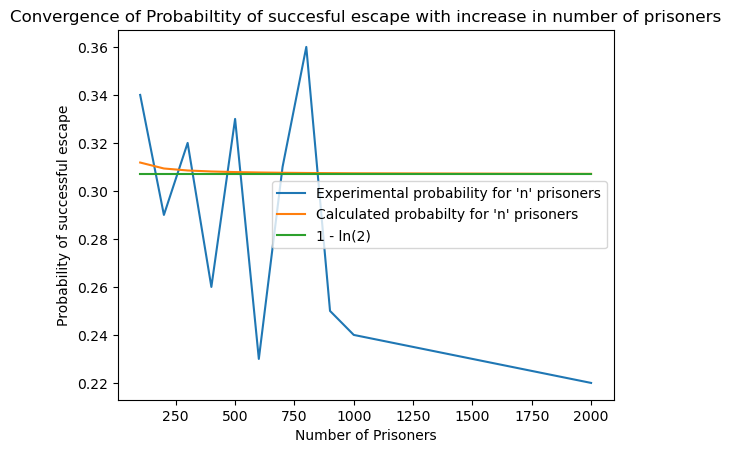

In [11]:
plt.plot(n_prisoners, prob)
plt.plot(n_prisoners, p_calc_n)
plt.plot(n_prisoners, p_inf)
plt.xlabel("Number of Prisoners")
plt.ylabel("Probability of successful escape")
plt.legend(["Experimental probability for 'n' prisoners", "Calculated probabilty for 'n' prisoners", "1 - ln(2)"])
plt.title("Convergence of Probabiltity of succesful escape with increase in number of prisoners")

In [12]:
#calculated probability for 100 prisoners
p_calc = calculated_prob(100)

In [13]:
# 100 experiments for 100 prisoners
prob_arr = []
for i in range(100):
    prob_arr.append(find_prob(100, 100))

In [14]:
exp_prob = sum(prob_arr)/len(prob_arr)

Text(0.5, 1.0, 'Experiments for 100 prisoners')

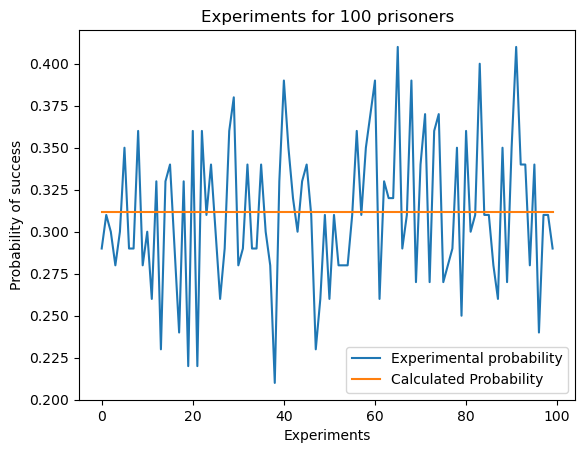

In [15]:
plt.plot(prob_arr)
plt.plot(p_calc*np.ones_like(prob_arr))
plt.xlabel("Experiments")
plt.ylabel("Probability of success")
plt.legend(["Experimental probability", "Calculated Probability"])
plt.title("Experiments for 100 prisoners")